In [61]:
import importlib
import draw_idt
importlib.reload(draw_idt)
from draw_idt import make_idt

import numpy as np
from math import pi
from math import pi
from gdshelpers.geometry.chip import Cell

from gdshelpers.geometry import geometric_union

### **Make a single IDT**

pos specifies the port coordinate of IDT, which can be used as waveguide port coordinate.

To make a single IDT, set pair=False. pair_distance and displacement_y don't matter when pair=False.

aperture, pair_num, pitch, finger_bias are parameters for IDT geometry; orientation can be 'left' or 'right'.

port coordinate:  [-100, 100]


/opt/miniconda3/envs/torch/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/miniconda3/envs/torch/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


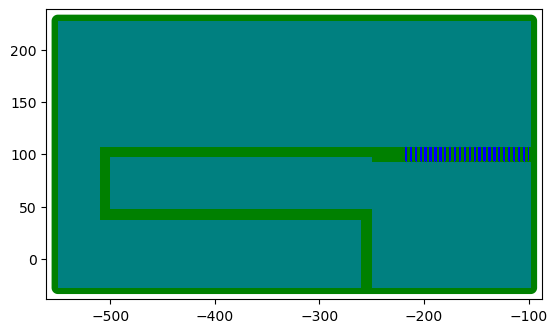

In [3]:
cell1 = Cell('IDT')
_, idt, pads, zno, port = make_idt(pos=[-100, 100], pair=False,
                        aperture=15, pair_num=50, pitch=2.4, finger_bias=0.01,
                        zno=True, orientation='right', pair_distance=200, displacement_y=50)

cell1.add_to_layer(2, geometric_union([zno]))
cell1.add_to_layer(3, geometric_union([idt]))
cell1.add_to_layer(4, geometric_union([pads]))
print('port coordinate: ', port)
cell1.show()

### **Make an IDT pair**

pos specifies the left-port coordinate of IDT, which can be used as waveguide port coordinate.

To make an IDT pair, set pair=False; pair_distance is the x distance between two IDTs; displacement_y is the y displacment between two IDTs.

aperture, pair_num, pitch, finger_bias are parameters for IDT geometry; orientation does not matter when pair=False.

Both the left-port and right-port coordinates are returned.

left port coordinate:  [-100, 100]
right port coordinate:  [100, 200]


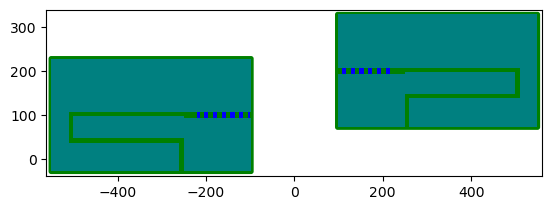

In [4]:
cell2 = Cell('IDT')
_, \
idt_left, idt_right, \
pads_left, pads_right, \
zno_left, zno_right, \
port_left, port_right = make_idt(pos=[-100, 100], pair=True,
                        aperture=15, pair_num=50, pitch=2.4, finger_bias=0.01,
                        zno=True, orientation='right', pair_distance=200, displacement_y=100)

cell2.add_to_layer(2, geometric_union([zno_left, zno_right]))
cell2.add_to_layer(3, geometric_union([idt_left, idt_right]))
cell2.add_to_layer(4, geometric_union([pads_left, pads_right]))
print('left port coordinate: ', port_left)
print('right port coordinate: ', port_right)
cell2.show()

In [6]:
cell1.save('IDT_library_GDS/IDT_new/new_idt_single.gds')
cell2.save('IDT_library_GDS/IDT_new/new_idt_pair.gds')

c:\Users\haoqi\miniconda3\envs\gds2\lib\site-packages\gdshelpers\geometry\shapely_adapter.py:117: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  in list(poly.interiors)])


### **The rounding of corners**

Rounding can be performed in KLayout. Hide all layers expect for the pads layer, select all the pads, click Edit-->Selection-->Round Corners, set both outer and inner corner to be 2. 

P.S. gdshelper doesn not support inner corner rounding.

### **Sweep IDT pair_num**

By default, cell parameter is set to none. If cell is not specified, only polygons will be returned. If cell is specified like below, polygons will be automatically written into the cell object, in addition to being returned.|

In [49]:
pair_num_list = [20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160]
pos_x = 0
pos_y = 0
cell=Cell('IDT_SWP')

for pair_num in pair_num_list:
    cell, idt, pads, zno, port = make_idt(cell=cell, pos=[pos_x, pos_y], pair=True,
                                aperture=15, pair_num=pair_num, pitch=0.4, finger_bias=0.01,
                                zno=False, orientation='right', pair_distance=700)
    pos_y += 300

cell.show()

ValueError: too many values to unpack (expected 5)

In [8]:
cell.save('IDT_library_GDS/IDT_new/new_idt_sweep.gds')

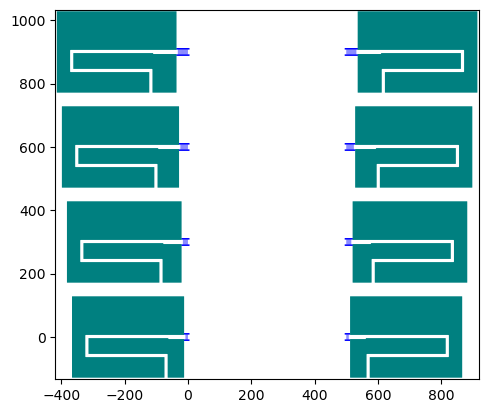

In [62]:
pair_num_list = [20, 40, 60, 80]
pos_x = 0
pos_y = 0
cell=Cell('IDT_SWP')

for pair_num in pair_num_list:
    _, \
    idt_left, idt_right, \
    pads_left, pads_right, \
    zno_left, zno_right, \
    port_left, port_right = make_idt(cell=cell, pos=[pos_x, pos_y], pair=True,
                                aperture=15, pair_num=pair_num, pitch=0.4, finger_bias=0.01,
                                zno=False, orientation='right', pair_distance=500)
    pos_y += 300

cell.add_to_layer(3, geometric_union([idt_left, idt_right]))
cell.add_to_layer(4, geometric_union([pads_left, pads_right]))

cell.show()

In [63]:
cell.save('IDT_library_GDS/IDT_new/LNOS_idt_dt.gds')